# <font color = red>Recommendation Engine : Hollywood Movies</font>

<font color=green>__Recommendation Engine__ :</font> 

> _Wondered how movies on any app/website like Netflix,Hotstar or even Google recommends movies. After this notebook I think everyone would be able create a recommendation. Lets get started..._ 


___P.S : I had to remove some images in this kernel. Kaggle wasnt letting me commit.___

Another Example : A recommendation engine filters the data using different algorithms and recommends the most relevant items to users. It first captures the past behavior of a customer and based on that, recommends products which the users might be likely to buy.

### There are 3 types of recommendation engines

    * Popularity Based Recommendation
This is the simplest kind of recommendation engine that you will come across. The trending list you see in YouTube or Netflix is based on this algorithm. It keeps a track of view counts for each movie/video and then lists movies based on views in descending order(highest view count to lowest view count)
    * Content Based Recommendation Engine
This type of recommendation systems, takes in a movie that a user currently likes as input. Then it analyzes the contents (storyline, genre, cast, director etc.) of the movie to find out other movies which have similar content. Then it ranks similar movies according to their similarity scores and recommends the most relevant movies to the user.
    * Collaborative Filtering Based Recommendation Engine
This algorithm at first tries to find similar users based on their activities and preferences (for example, both the users watch same type of movies or movies directed by the same director). Now, between these users(say, A and B) if user A has seen a movie that user B has not seen yet, then that movie gets recommended to user B and vice-versa. In other words, the recommendations get filtered based on the collaboration between similar user’s preferences (thus, the name “Collaborative Filtering”). One typical application of this algorithm can be seen in the Amazon e-commerce platform, where you get to see the “Customers who viewed this item also viewed” and “Customers who bought this item also bought” list.    

__We will go through content based and collaborative filtering based recommendation engines.__

**********************************************************************

In [ ]:
import numpy as np
import pandas as pd

### Content Based Recommendation Engine

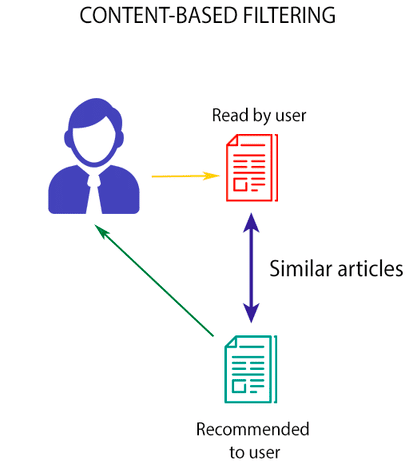

In this we have 2 datasets you will get the idea about the datasets below

### Method 1

In [ ]:
credits = pd.read_csv('/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv')
movies_df = pd.read_csv('/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv')

In [ ]:
print(credits.shape)
print(movies_df.shape)

In [ ]:
credits.head()

In [ ]:
movies_df.shape

In [ ]:
movies_df.head()

In [ ]:
# making the column name same for merging the two datasets
credits = credits.rename(index = str,columns = {'movie_id':'id'})

In [ ]:
# merging the datasets
movies = movies_df.merge(credits,on = 'id')

In [ ]:
movies.head()

In [ ]:
# drop the unnecessary columns
movies = movies.drop(['homepage','title_x','title_y','status','production_countries'],1)

In [ ]:
movies.info()

##### Note : 
The Overview feature in the dataset is the heart of this recommendation engine. As this feature includes the overall summary about the movie.              

In [ ]:
movies['overview'].head(1)

To create a recommendation we need to create a vectors of matrix for each movies.

To play with NLP concepts or we can say to understand or create vector of matrix so that
our overview column can be converted into machine understable format, for this we will be using 
TF-IDF (Term frequency–inverse document frequency)

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

TF-IDF is a technique which will help us to create a document matrix for those types of sentences.
Document matrix is nothing but vector of sentences

In [ ]:
tfv = TfidfVectorizer(stop_words='english',min_df = 3,max_features=None, strip_accents='unicode',
                     analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,3))
# ngram_range will take the combination of 1 to 3 different kind of words
# stopwords is used to ignore words like 'the','a','is', etc types of words
# strip_accents, analyzer and token_pattern are used to remove unnecessary letters like '!',',',''
# meaning special symbols
# fill the null values.
movies['overview'] = movies['overview'].fillna('')

In [ ]:
tfv_matrix = tfv.fit_transform(movies['overview'])

In [ ]:
tfv_matrix

Here we can see that a sparse matrix is created which has many 0's inside it

In [ ]:
tfv_matrix.shape

After that we will be using sigmoid kernel as we know sigmoid is nothing but a S like curve between 0 to 1.

So sigmoid will just convert the values between 0 and 1.

Suppose we are finding sigmoid value of sentence 1 and sentence 2 from overview column we will get a value. Lets say 0.5 , this will indicate that movie1 is half similar to movie 2.

Sigmoid basically gives us the similarity score of the vector matrix that we had created above

In [ ]:
from sklearn.metrics.pairwise import sigmoid_kernel
sig = sigmoid_kernel(tfv_matrix,tfv_matrix)

I know you are thinking why we have given tfv matrix with tfv matrix. This is because so that I can generate a dataframe of the similarity scores with each movie and many would have null values because of null similarity.

In [ ]:

sig[0]

In [ ]:
# Lets give indexes to the movie
indices = pd.Series(movies.index, index = movies['original_title']).drop_duplicates()

In [ ]:
indices

In [ ]:
# index of the maze runner
indices['The Maze Runner']

#### This is the function for content based recommendation system

In [ ]:
def recommend(title, sig = sig):
    # Here title is in text and we will get the respective index assigned to it
    index = indices[title]
    # lets calculate the sigmoid scores of this movie with every other movie.
    sigmoid_scores = list(enumerate(sig[index]))
    # Sort it descending so that top correlated can be listed on top
    sigmoid_scores = sorted(sigmoid_scores,key = lambda x: x[1], reverse = True)
    # We will take only top 5 recommendations
    sigmoid_scores = sigmoid_scores[1:6]
    
    movie_indices = [i[0] for i in sigmoid_scores]
    
    return movies['original_title'].iloc[movie_indices]

In [ ]:
print(' Top Recommendations for this Movie is : ')
recommend('The Dark Knight')

Lets try one more time

In [ ]:
print('Recommendation for the Fast and furious 5 : \n',recommend('Fast Five'))

__With this type of basic recommendation engine, I hope you should have some questions after seeing the recommendations. Post a comment if you could identify what are the problems and what type of recommendations we can expect.__

In the above method we have TF-IDF for vectorizing and used sigmoid for similarity scoring.

### Method 2

Now in this method of Content Based Filtering we will use the same data set above 

But this time for vectorizing we will use ___Count Vectorizer___.

And for similarity scoring we will use ___Cosine Similarity___

In [ ]:
# lets import libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

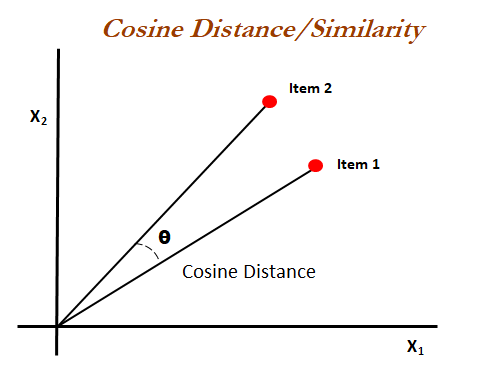

Here the angle between item 1 and item 2 is known as cosine simalrity which lies between 0 to 1 in the first quadrant. 

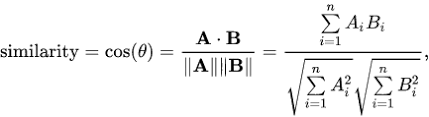

In [ ]:
# dataset
movies.head()

In [ ]:
cv = CountVectorizer(stop_words='english')
cv_matrix = cv.fit_transform(movies['overview'])

In [ ]:
cv_matrix.shape

In [ ]:
cv_matrix

Again we got a sparse matrix that we have seen in tfidf vectorizer also but this time the counts are mainly focused.

In [ ]:
cos_similarity = cosine_similarity(cv_matrix)

In [ ]:
cos_similarity

In [ ]:
## Again lets take the indexes
indexes = pd.Series(movies.index, index = movies['original_title']).drop_duplicates()

As we can see we are getting the values in between 0 and 1, mostly are 0's

In [ ]:
def recommend_m2(title,cos = cos_similarity):
    index = indexes[title]
    
    similarity_score = list(enumerate(cos_similarity[index]))
    
    similarity_score = sorted(similarity_score, reverse = True,key = lambda x:x[1])
    
    similarity_score = similarity_score[1:6]
    
    movie_indexes = [i[0] for i in similarity_score]
    
    return movies['original_title'].iloc[movie_indexes]
    
    

In [ ]:
recommend_m2('Fast Five')

In [ ]:
recommend_m2('The Maze Runner')

In [ ]:
recommend_m2('Star Wars')

So by this time when i got those results I wanted to check on google what google recommends.

Just check this out







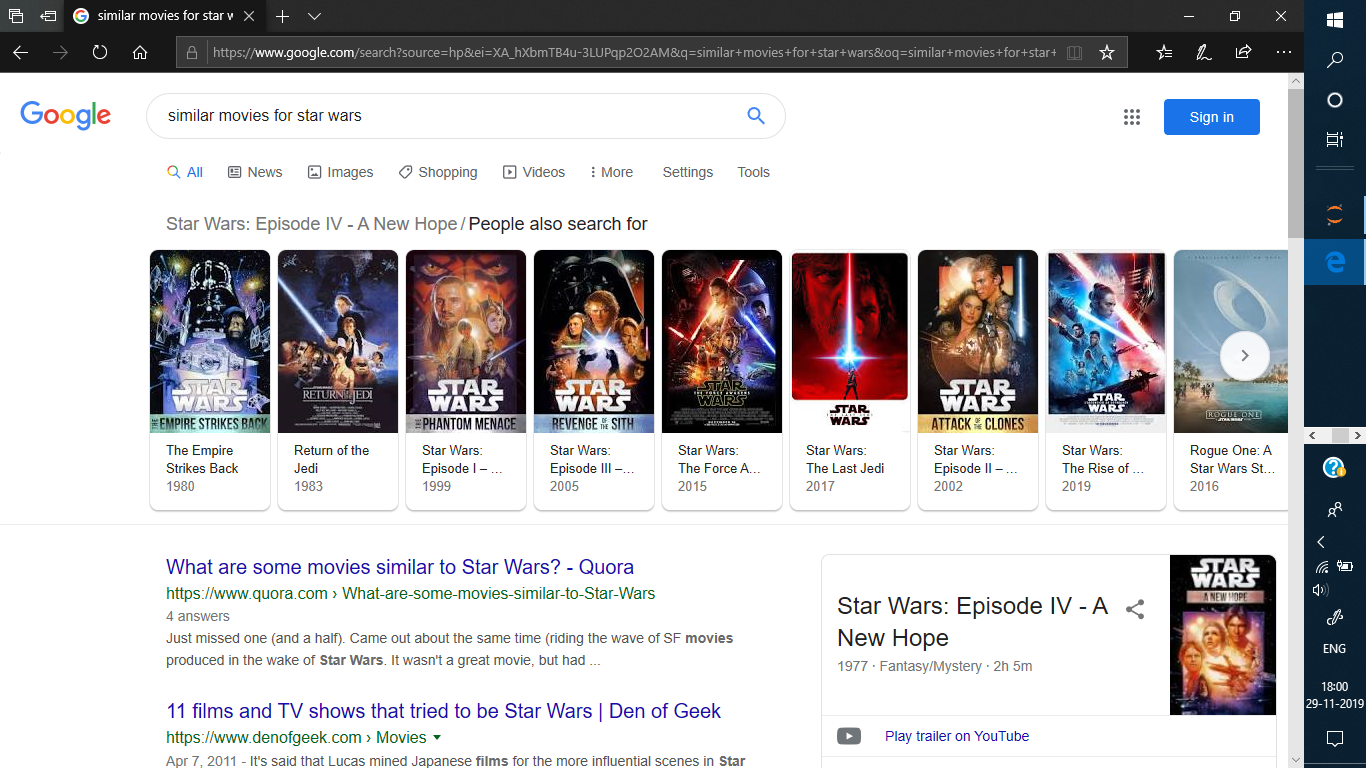

So we can see we got some good recommendations on those movies with method 2 of content based filtering.

__This was the recommendation engine based on content based filtering__
*************
__********TMDB MOVIES Dataset********__
****************
__Soon will be uploading a kernel on collaborative based filtering__
***********
__Any comments/feedbacks are most welcome__
***********
__Thanx for visiting my kernel__
